# pandas
## 1 Pandas基础
### 1.1 Series数据结构
Series：一维的带索引数据结构(单列)

Series类：
`
pd.Series(data=None,index=None,dtype=None,name=None,copy=False,fastpath=Fals`e)

In [1]:
import pandas as pd
import numpy as np
sdata = pd.Series(np.arange(1,4), index=list('abc'))
sdata

a    1
b    2
c    3
dtype: int32

In [2]:
#默认数字索引
print(sdata[0])
#使用标签[a,b,c]
print(sdata['b'])
#使用loc方式，只能使用标签
print(sdata.loc['c'])

1
2
3


C:\Users\26822\AppData\Local\Temp\ipykernel_7904\3126746192.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sdata[0])


In [3]:
#获取索引：
sdata.index.values

array(['a', 'b', 'c'], dtype=object)

In [4]:
#获取索引
sdata.values

array([1, 2, 3])

In [5]:
#将索引转成列表
sdata.index.values.tolist()

['a', 'b', 'c']

In [6]:
#将数据转成列表
sdata.values.tolist()

[1, 2, 3]

In [7]:
# Series对象访问
for item in sdata.items():
    print(item)

('a', 1)
('b', 2)
('c', 3)


## 1.2 dataframe
DataFrame：多种类型的列构成的二维标签数据结构(多列)；

DataFrame类：

`pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

- data:一维数据，二维数据
- index:行标签
- columns:列标签

In [8]:
# 一维数据
pd.DataFrame(data=np.arange(1,4))

,0
0,1
1,2
2,3


In [9]:
# 多维数据 data为4X4
data = np.arange(16).reshape(4,4)
pd.DataFrame(data=data)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [10]:
# 设置index与columns
data = np.arange(16).reshape(4,4)
pdata = pd.DataFrame(data=data, index=list('abcd'), columns=['c1','c2','c3','c4'])
pdata

,c1,c2,c3,c4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [11]:
# 使用字典创建DataFrame
data = {'c1':[1,2,3], 'c2':[4,5,6]}
pdata = pd.DataFrame(data=data)
pdata

,c1,c2
0,1,4
1,2,5
2,3,6


In [12]:
# 设置列标签
pdata.columns = ['t1','t2']
pdata

,t1,t2
0,1,4
1,2,5
2,3,6


### 1.2.1 DataFrame对象访问

In [13]:
data = {'c1':[1,2,3], 'c2':[4,5,6], 'c3':[7,8,9]}
pdata = pd.DataFrame(data=data)
pdata

,c1,c2,c3
0,1,4,7
1,2,5,8
2,3,6,9


In [14]:
#获取一列数据，返回Series对象
pdata['c1']

0    1
1    2
2    3
Name: c1, dtype: int64

In [15]:
#取多列数据
pdata[['c1','c2']]

,c1,c2
0,1,4
1,2,5
2,3,6


### 1.2.2 loc操作
loc操作：使用类似列表方式去对数据进行访问，支持bool索引;

In [16]:
import pandas as pd
data = {'c1':[1,2,3], 'c2':[4,5,6], 'c3':[7,8,9]}
pdata = pd.DataFrame(data=data)
pdata

,c1,c2,c3
0,1,4,7
1,2,5,8
2,3,6,9


In [17]:
#获取第一行
pdata.loc[0]

c1    1
c2    4
c3    7
Name: 0, dtype: int64

In [18]:
#获取第一行指定c1,c2列
pdata.loc[0,['c1','c2']]

c1    1
c2    4
Name: 0, dtype: int64

In [19]:
#获取列索引
for item in pdata:
    print(item)

c1
c2
c3


In [20]:
#按列遍历
for item in pdata.items():
    print(item)

('c1', 0    1
1    2
2    3
Name: c1, dtype: int64)
('c2', 0    4
1    5
2    6
Name: c2, dtype: int64)
('c3', 0    7
1    8
2    9
Name: c3, dtype: int64)


In [21]:
#按行遍历
for item in pdata.iterrows():
    print(item)

(0, c1    1
c2    4
c3    7
Name: 0, dtype: int64)
(1, c1    2
c2    5
c3    8
Name: 1, dtype: int64)
(2, c1    3
c2    6
c3    9
Name: 2, dtype: int64)


### 1.2.3 DataFrame修改

In [22]:
# 修改元素
import pandas as pd
data = {'c1':[1,2,3], 'c2':[4,5,6], 'c3':[7,8,9]}
pdata = pd.DataFrame(data=data)
#修改c1列值
pdata['c1'] = 0
pdata

,c1,c2,c3
0,0,4,7
1,0,5,8
2,0,6,9


In [23]:
# DataFrame插入列
import pandas as pd
data = {'c1':[1,2,3], 'c2':[4,5,6], 'c3':[7,8,9]}
pdata = pd.DataFrame(data=data)
#修改c1列值
pdata['c4'] = [-1,-1,-1]
pdata

,c1,c2,c3,c4
0,1,4,7,-1
1,2,5,8,-1
2,3,6,9,-1


In [24]:
# DataFrame插入行
import pandas as pd
data = {'c1':[1,2,3], 'c2':[4,5,6], 'c3':[7,8,9]}
pdata = pd.DataFrame(data=data)
#修改c1列值
pdata.loc[3] = [-1,-1,-1]
pdata

,c1,c2,c3
0,1,4,7
1,2,5,8
2,3,6,9
3,-1,-1,-1


## 2 pandas数据导入与保存
目的：
- 数据导入：excel, csv文件
- 数据导出
- 基本统计
- 缺省数据处理

### 2.1 数据导入
数据是分析基础，实际工作中，数据来自于企业内部数据，网络数据，开源数据集；


In [25]:
import pandas as pd
import numpy as np
#读取excel文件
fpath = r'data\test.xlsx'
pdata = pd.read_excel(fpath)
pdata

,序号,姓名,数学,语文
0,1,赵,99,87
1,2,钱,88,92
2,3,孙,77,73
3,4,李,66,68


In [26]:
#读取csv文件
fpath = r'data\GDP.csv'
pdata = pd.read_csv(fpath, encoding='gbk')
pdata

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041160e+11,1.153980e+11,1.249120e+11,1.267770e+11,1.029620e+11,9.533511e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.649291e+09,6.473725e+09,7.072092e+09,7.386891e+09,6.440501e+09,6.649889e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.539315e+10,4.041523e+10,4.322858e+10,3.773392e+10,2.731761e+10,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972170e+11,3.752980e+11,4.168780e+11,3.963330e+11,3.668100e+11,3.511190e+11,3.176110e+11,2.954560e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.106399e+10,NaN


In [27]:
#导入指定列
fpath = r'data\GDP.csv'
pdata = pd.read_csv(fpath,usecols = ['Country Name','1990'], encoding='gbk')
pdata

,Country Name,1990
0,Aruba,NaN
1,Afghanistan,NaN
2,Angola,1.002674e+10
3,Albania,2.101625e+09
4,Andorra,1.029048e+09
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",5.647252e+09
261,South Africa,1.155530e+11
262,Zambia,3.285217e+09


In [28]:
#导入指定表头
fpath = r'data\GDP.csv'
pdata = pd.read_csv(fpath,header=1, encoding='gbk')
pdata

,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,2791960894,2498932961,2467703911,2584463687,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
1,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041160e+11,1.153980e+11,1.249120e+11,1.267770e+11,1.029620e+11,9.533511e+10,NaN
2,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
3,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN
4,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.078120e+12,1.795820e+12,2.109650e+12,2.501550e+12,2.741240e+12,2.839630e+12,2.906620e+12,2.563300e+12,2.504700e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.649291e+09,6.473725e+09,7.072092e+09,7.386891e+09,6.440501e+09,6.649889e+09,NaN
259,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.539315e+10,4.041523e+10,4.322858e+10,3.773392e+10,2.731761e+10,NaN
260,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972170e+11,3.752980e+11,4.168780e+11,3.963330e+11,3.668100e+11,3.511190e+11,3.176110e+11,2.954560e+11,NaN
261,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.106399e+10,NaN


In [29]:
#无表头指定None
pdata = pd.read_csv(fpath,header=None, encoding='gbk')
pdata

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2017.0
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041160e+11,1.153980e+11,1.249120e+11,1.267770e+11,1.029620e+11,9.533511e+10,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.649291e+09,6.473725e+09,7.072092e+09,7.386891e+09,6.440501e+09,6.649889e+09,NaN
261,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.539315e+10,4.041523e+10,4.322858e+10,3.773392e+10,2.731761e+10,NaN
262,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972170e+11,3.752980e+11,4.168780e+11,3.963330e+11,3.668100e+11,3.511190e+11,3.176110e+11,2.954560e+11,NaN
263,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.106399e+10,NaN


### 2.2 数据保存


In [30]:
#保存文件
import pandas as pd
import numpy as np
#读取excel文件
fpath = r'data\GDP.csv'
csv_path1 = r'data\new_GDP_1.csv'
csv_path2 = r'data\new_GDP_2.csv'
csv_path3 = r'data\new_GDP_3.csv'
pdata = pd.read_csv(fpath, encoding='gbk')
#保存格式带索引
pdata.to_csv(csv_path1)
#保存格式不带索引
pdata.to_csv(csv_path2, index=False)
#保存格式不带索引,保存指定列
pdata.to_csv(csv_path3, index=False, columns=['1990','1991'])

In [31]:
pdata = pd.read_csv(csv_path1, encoding='gbk')
pdata

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
2,2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041160e+11,1.153980e+11,1.249120e+11,1.267770e+11,1.029620e+11,9.533511e+10,NaN
3,3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
4,4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.649291e+09,6.473725e+09,7.072092e+09,7.386891e+09,6.440501e+09,6.649889e+09,NaN
260,260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.539315e+10,4.041523e+10,4.322858e+10,3.773392e+10,2.731761e+10,NaN
261,261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,...,2.871000e+11,2.972170e+11,3.752980e+11,4.168780e+11,3.963330e+11,3.668100e+11,3.511190e+11,3.176110e+11,2.954560e+11,NaN
262,262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.106399e+10,NaN


In [32]:
pdata = pd.read_csv(csv_path2, encoding='gbk')
pdata

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041160e+11,1.153980e+11,1.249120e+11,1.267770e+11,1.029620e+11,9.533511e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.649291e+09,6.473725e+09,7.072092e+09,7.386891e+09,6.440501e+09,6.649889e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.539315e+10,4.041523e+10,4.322858e+10,3.773392e+10,2.731761e+10,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972170e+11,3.752980e+11,4.168780e+11,3.963330e+11,3.668100e+11,3.511190e+11,3.176110e+11,2.954560e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.106399e+10,NaN


In [33]:
pdata = pd.read_csv(csv_path3, encoding='gbk')
pdata

,1990,1991
0,NaN,NaN
1,NaN,NaN
2,1.002674e+10,1.211861e+10
3,2.101625e+09,1.139167e+09
4,1.029048e+09,1.106929e+09
...,...,...
259,NaN,NaN
260,5.647252e+09,5.930370e+09
261,1.155530e+11,1.239430e+11
262,3.285217e+09,3.378882e+09


## 3 缺失数据处理
### 3.1 缺失值与空值
缺省值：数据集中数值为空的值, pandas使用Nan/NaT表示

空值：空字符串""

In [34]:
s1 = [10, 10.5, None, 11]
s2 = [7, 6.9,7.5,None]
pdata = pd.DataFrame({'s1':s1, 's2':s2})
pdata

,s1,s2
0,10.0,7.0
1,10.5,6.9
2,NaN,7.5
3,11.0,NaN


### 3.2缺失值判断
判断方法：
- pd.isnull():缺省值对应的值为True，返回值为Boolean的Series或者DataFrame对象
- pd.notnull():缺省值对应的值为False，返回值为Boolean的Series或者DataFrame对象
- pdata.isnull()/pdata.notnull()：同上

In [35]:
sdata = pd.Series([1,2,3, np.NaN])
pd.isnull(sdata)

0    False
1    False
2    False
3     True
dtype: bool

In [36]:
s1 = [10, 10.5, None, 11]
s2 = [7, 6.9,7.5,None]
pdata = pd.DataFrame({'s1':s1, 's2':s2})
pd.isnull(pdata)

,s1,s2
0,False,False
1,False,False
2,True,False
3,False,True


### 3.3 判断是否有缺失值
方式:np.all与pd.notnull结合

In [37]:
s1 = [10, 10.5, None, 11]
s2 = [7, 6.9,7.5,None]
pdata = pd.DataFrame({'s1':s1, 's2':s2})
#pd.notnull,若包含缺省值，缺省值对应值为False
#np.all：若对象中包含假，返回False， 否则返回真
np.all(pd.notnull(pdata))
#返回False， 说明包含缺省值，否则不包含缺省值

False

In [38]:
s1 = [10, 10.5, 11]
s2 = [7, 6.9,7.5]
pdata = pd.DataFrame({'s1':s1, 's2':s2})
np.all(pd.notnull(pdata))

True

In [39]:
s1 = [10, 10.5, 11]
s2 = [7, 6.9,7.5]
pdata = pd.DataFrame({'s1':s1, 's2':s2})
#isnull：缺省值对应值为True
#any:对象中包含真，返回True
np.any(pd.isnull(pdata))
#返回False,说明不含缺省值，返回True说明包括缺省值

False

In [40]:
s1 = [10, 10.5, None, 11]
s2 = [7, 6.9,7.5,None]
pdata = pd.DataFrame({'s1':s1, 's2':s2})
pdata

,s1,s2
0,10.0,7.0
1,10.5,6.9
2,NaN,7.5
3,11.0,NaN


In [41]:
bindex = pdata.notnull()
bindex

,s1,s2
0,True,True
1,True,True
2,False,True
3,True,False


In [42]:
np.all(bindex,axis=1)

0     True
1     True
2    False
3    False
dtype: bool

### 3.4 缺省值处理方式
缺省值处理：
- 过滤缺省值(按行列)
- 删除缺省值(按行列)
- 填充值，填充值方式：
- 插入均值，中位数,最大值，最小值等
- 插入特殊值
- 插入前(后)值入前(后)值

#### 3.4.1 缺省值过滤

In [43]:
#数据：某两只股票1周收盘值，None表示当前停盘
s1 = [10, 10.5, None, 11]
s2 = [7, 6.9,7.5,None]
pdata = pd.DataFrame({'s1':s1, 's2':s2})
pdata

,s1,s2
0,10.0,7.0
1,10.5,6.9
2,NaN,7.5
3,11.0,NaN


In [44]:
# 需求：获取两只股票都没有停牌的数据
#获取boolean索引
bindex = np.all(pdata.notnull(), axis=1)
bindex

0     True
1     True
2    False
3    False
dtype: bool

In [45]:
#获取没有停牌数据
pdata[bindex]

,s1,s2
0,10.0,7.0
1,10.5,6.9


#### 3.4.2 删除缺省值
pdata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

主要参数：
- axis 0/'index':按行，1/'columns':按列
- how 根据axis，any:一个为Na删除，all:全部为Na删除
- thresh 指定非Na数量(非Na数量>=thresh，不删除)
- subset 指定列子集
- inplace True:在原始数据中修改据中修改

In [46]:
s1 = [10, 10.5, None, 11]
s2 = [7, 6.9,7.5,None]
s3 = [7, 6.9,7.5,7]
s4 = [None, 6.9,None,7.2]
pdata = pd.DataFrame({'s1':s1, 's2':s2, 's3':s3,'s4':s4})
pdata

,s1,s2,s3,s4
0,10.0,7.0,7.0,NaN
1,10.5,6.9,6.9,6.9
2,NaN,7.5,7.5,NaN
3,11.0,NaN,7.0,7.2


In [47]:
#删除包含缺省值行
pdata.dropna()

,s1,s2,s3,s4
1,10.5,6.9,6.9,6.9


In [48]:
#缺省值数量大于1，thresh设置为3
#thresh:指定非Na数量(非Na数量>=thresh，不删除)
pdata.dropna(thresh=3)

,s1,s2,s3,s4
0,10.0,7.0,7.0,NaN
1,10.5,6.9,6.9,6.9
3,11.0,NaN,7.0,7.2


In [49]:
#指定列：['s1','s4']
pdata.dropna(subset=['s1','s4'])

,s1,s2,s3,s4
1,10.5,6.9,6.9,6.9
3,11.0,NaN,7.0,7.2


In [50]:
#删除包含缺省值列
pdata.dropna(axis=1)

,s3
0,7.0
1,6.9
2,7.5
3,7.0


注意：
- 以上数据删除都不对原始数据进行修改
- 指定inplace为True，在原始数据中进行修改

#### 3.4.3 缺失值填充
填充方法： pdata.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

- value 填充值
- method 填充方式：{'backfill', 'bfill', 'pad', 'ffill', None}
- axis 指定行列：0 or 'index', 1 or 'columns'
- 
limit 插入数量限制修改

In [51]:
pdata

,s1,s2,s3,s4
0,10.0,7.0,7.0,NaN
1,10.5,6.9,6.9,6.9
2,NaN,7.5,7.5,NaN
3,11.0,NaN,7.0,7.2


需求：
- 缺省值填充固定值0
- 使用前/后面数据填充
- 使用均值填充
- 插入均值插入均值

In [52]:
#固定值0
pdata.fillna(0)

,s1,s2,s3,s4
0,10.0,7.0,7.0,0.0
1,10.5,6.9,6.9,6.9
2,0.0,7.5,7.5,0.0
3,11.0,0.0,7.0,7.2


In [53]:
#使用前一行数据填充
pdata.fillna(method='ffill')

C:\Users\26822\AppData\Local\Temp\ipykernel_7904\1934217872.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pdata.fillna(method='ffill')


,s1,s2,s3,s4
0,10.0,7.0,7.0,NaN
1,10.5,6.9,6.9,6.9
2,10.5,7.5,7.5,6.9
3,11.0,7.5,7.0,7.2


In [54]:
#使用后一行数据填充
pdata.fillna(method='bfill')

C:\Users\26822\AppData\Local\Temp\ipykernel_7904\1482464429.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pdata.fillna(method='bfill')


,s1,s2,s3,s4
0,10.0,7.0,7.0,6.9
1,10.5,6.9,6.9,6.9
2,11.0,7.5,7.5,7.2
3,11.0,NaN,7.0,7.2


In [55]:
#使用后一列数据填充
pdata.fillna(axis=1,method='bfill')

C:\Users\26822\AppData\Local\Temp\ipykernel_7904\201099427.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pdata.fillna(axis=1,method='bfill')


,s1,s2,s3,s4
0,10.0,7.0,7.0,NaN
1,10.5,6.9,6.9,6.9
2,7.5,7.5,7.5,NaN
3,11.0,7.0,7.0,7.2


#### 3.4.4 插入均值，中位数，最大值，最小值
`pdata.mean/max/min/median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)`

主要参数：
- axis 方向,0:列，1：行
- skipna 不计算na, 默认Truee

In [56]:
pdata

,s1,s2,s3,s4
0,10.0,7.0,7.0,NaN
1,10.5,6.9,6.9,6.9
2,NaN,7.5,7.5,NaN
3,11.0,NaN,7.0,7.2


In [57]:
#插入均值
pdata.fillna(pdata.mean())

,s1,s2,s3,s4
0,10.0,7.000000,7.0,7.05
1,10.5,6.900000,6.9,6.90
2,10.5,7.500000,7.5,7.05
3,11.0,7.133333,7.0,7.20


In [58]:
#插入中位数
pdata.fillna(pdata.median())

,s1,s2,s3,s4
0,10.0,7.0,7.0,7.05
1,10.5,6.9,6.9,6.90
2,10.5,7.5,7.5,7.05
3,11.0,7.0,7.0,7.20


## 4 数据清洗

In [59]:
import pandas as pd
import numpy as np
#
names = list('ABCD')
math = [90,100,50,80]
chinese = [89,96,58,77]
pdata = pd.DataFrame({'name':names, 'math':math, 'chinese':chinese})
pdata

,name,math,chinese
0,A,90,89
1,B,100,96
2,C,50,58
3,D,80,77


In [60]:
# 获取指定列
# 通过列名，直接获取值
pdata['name']

0    A
1    B
2    C
3    D
Name: name, dtype: object

In [61]:
# 获取指定多列
# 基本方法：pdata[[col1, col2]]
pdata[['name', 'math']]

,name,math
0,A,90
1,B,100
2,C,50
3,D,80


In [62]:
# 根据指定条件获取数据
# 需求1：数学成绩大于80的所有成绩;
bindex = pdata['math'] > 80
pdata[bindex]

,name,math,chinese
0,A,90,89
1,B,100,96


In [63]:
#需求2：获取同学A的成绩;
pdata[pdata['name']=='A']

,name,math,chinese
0,A,90,89


In [64]:
# 根据指定多个条件获取数据
# 需求1：获取数学语文都及格成绩
# 注意：两个条件要加括号
pdata[(pdata['math']>59) & (pdata['chinese']>59)]

,name,math,chinese
0,A,90,89
1,B,100,96
3,D,80,77


In [65]:
# 需求1：获取数学语文有一门大于等于80分
# 注意：两个条件要加括号
pdata[(pdata['math']>=80) | (pdata['chinese']>=80)]

,name,math,chinese
0,A,90,89
1,B,100,96
3,D,80,77


In [66]:
# 根据集合获取数据
bindex = pdata['math'].isin([100, 90])
pdata[bindex]

,name,math,chinese
0,A,90,89
1,B,100,96


In [67]:
# 根据数据排序
import pandas as pd
import numpy as np
names = list('ABCD')
math = [90,100,80,80]
chinese = [89,96,58,77]
pdata = pd.DataFrame({'name':names, 'math':math, 'chinese':chinese})
pdata

,name,math,chinese
0,A,90,89
1,B,100,96
2,C,80,58
3,D,80,77


In [68]:
#根据索引排序，降序,ascending=False
pdata.sort_index(ascending=False)

,name,math,chinese
3,D,80,77
2,C,80,58
1,B,100,96
0,A,90,89


In [69]:
#根据数学成绩排序，降序,ascending=False
pdata.sort_values(['math'], ascending=False)

,name,math,chinese
1,B,100,96
0,A,90,89
2,C,80,58
3,D,80,77


In [70]:
#根据数学与语文成绩排序，降序,ascending=False
#sort_values中加入两列数据
pdata.sort_values(['math', 'chinese'], ascending=False)

,name,math,chinese
1,B,100,96
0,A,90,89
3,D,80,77
2,C,80,58


## 5 pandas汇总与描述性统计
pandas计算与统计相关方法：

- 最大值：pdata.max(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
- 最小值：pdata.min(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
- 均值：pdata.mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
- 中位数：pdata.median(axis=None,skipna=None,level=None,numeric_only=None, **kwargs)
- 求和：pdata.sum(axis=None,skipna=None,level=None,numeric_only=None,min_count=0,**kwargs)
- 方差：pdata.var(axis=None,skipna=None,level=None,ddof=1,numeric_only=None,**kwargs)
- 标准差：pdata.std(axis=None,skipna=None,level=None,ddof=1,numeric_only=None,**kwargs)
- 累加和：pdata.cumsum(axis=None, skipna=True, *args, **kwargs)
- 分位数：pdata.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')
- 每个数值到均值的平均差：pdata.mad(axis=None, skipna=None, level=None)
- 元素与先前元素的相差百分比:pdata.pct_change(periods=1,fill_method='pad',limit=None,freq=None,**kwargs)
- 偏度：pdata.skew(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
- 峰度：pdata.kurt(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
- 数据描述：pdata.describe(percentiles=None, include=None, exclude=None)exclude=None)

In [71]:
import pandas as pd
import numpy as np
#
names = list('ABCD')
math = [90,100,80,80]
chinese = [89,96,58,77]
pdata = pd.DataFrame({'name':names, 'math':math, 'chinese':chinese})
pdata

,name,math,chinese
0,A,90,89
1,B,100,96
2,C,80,58
3,D,80,77


In [72]:
#最大值，最小值，四分位数，均值，数量，标准差
pdata.describe()

,math,chinese
count,4.000000,4.0000
mean,87.500000,80.0000
std,9.574271,16.6333
min,80.000000,58.0000
25%,80.000000,72.2500
50%,85.000000,83.0000
75%,92.500000,90.7500
max,100.000000,96.0000


In [74]:
#计算每个学生总分,平均分
print(pdata.iloc[:, 1:].sum(axis=1))
print(pdata.iloc[:, 1:].mean(axis=1))

0    179
1    196
2    138
3    157
dtype: int64
0    89.5
1    98.0
2    69.0
3    78.5
dtype: float64


In [75]:
#下四分位数
print(pdata.quantile(q=0.25))
#中位数
print(pdata.quantile(q=0.5))
#上位数
print(pdata.quantile(q=0.75))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## 6 索引/多级索引
主要内容：
- 重置索引
- 索引变换
- 多级索引索引

In [ ]:
import pandas as pd
import numpy as np
names = list('ABCDABCD')
pdata = pd.DataFrame(np.random.randint(30,100, size=(8,2)),columns=['math','chinese'])
pdata['team'] = [1]*4+[2]*4
pdata['name'] = names
pdata

,math,chinese,team,name
0,50,85,1,A
1,40,64,1,B
2,88,75,1,C
3,33,50,1,D
4,89,62,2,A
5,73,75,2,B
6,85,72,2,C
7,83,46,2,D


### 6.1 设置索引
name设置为索引

重置索引方法：pdata.set_index(keys,drop=True,append=False,inplace=False)

In [ ]:
#设置索引
#set_index:inplace返回副本，新数据
ndata = pdata.set_index('name')
ndata

,math,chinese,team
name,,,
A,50,85,1
B,40,64,1
C,88,75,1
D,33,50,1
A,89,62,2
B,73,75,2
C,85,72,2
D,83,46,2


### 6.2多级索引
需求：通过索引获取指定学期数据：


In [ ]:
import pandas as pd
import numpy as np
names = list('ABCDABCD')
pdata = pd.DataFrame(np.random.randint(30,100, size=(8,2)),columns=['math','chinese'])
pdata

,math,chinese
0,73,85
1,38,60
2,41,37
3,62,65
4,79,56
5,59,51
6,37,73
7,83,32


In [ ]:
lv1 = [1]*4+[2]*4
lv2 = list('ABCDABCD')
#创建MultiIndex对象
mindex = pd.MultiIndex.from_arrays([lv1, lv2])
data = pdata.set_index(mindex)
data

math  chinese
1 A    73       85
  B    38       60
  C    41       37
  D    62       65
2 A    79       56
  B    59       51
  C    37       73
  D    83       32

### 6.3 通过多级索引取值

需求：
- 获取第一学期数据
- 获取第一学期A同学数据
- 获取A同学所有数据有数据

In [ ]:
#第一学期数据
data.loc[1]

,math,chinese
A,73,85
B,38,60
C,41,37
D,62,65


In [ ]:
#第一学期A同学数据
data.loc[(1,'A')]

math       73
chinese    85
Name: (1, A), dtype: int32

In [ ]:
# 如何获取A同学所有数据？
# 索引交换
data = data.swaplevel(0,1)
data

,,math,chinese
A,1,73,85
B,1,38,60
C,1,41,37
D,1,62,65
A,2,79,56
B,2,59,51
C,2,37,73
D,2,83,32


In [ ]:
data.loc['A']

,math,chinese
1,73,85
2,79,56


### 6.4 行列变换
- pdata.stack(level=-1, dropna=True):将列“旋转”为行
- 
pdata.unstack(level=-1, fill_value=None):将行“旋转”为列

In [ ]:
import pandas as pd
import numpy as np
names = list('ABCDABCD')
pdata = pd.DataFrame(np.random.randint(30,100, size=(8,2)),columns=['math','chinese'])
lv1 = [1]*4+[2]*4
lv2 = list('ABCDABCD')
mindex = pd.MultiIndex.from_arrays([lv1, lv2])
pdata = pdata.set_index(mindex)
pdata

math  chinese
1 A    44       75
  B    37       42
  C    30       54
  D    79       38
2 A    42       93
  B    42       31
  C    58       72
  D    75       65

需求：
- 将学期转到列
- 获取所有学生数学成绩
- 获取第一学期数据数据


In [ ]:
tmp = pdata.unstack(level=0)
tmp

math     chinese    
     1   2       1   2
A   44  42      75  93
B   37  42      42  31
C   30  58      54  72
D   79  75      38  65

In [ ]:
tmp['math']

,1,2
A,44,42
B,37,42
C,30,58
D,79,75


In [ ]:
#列索引层级交换，获取第一学期数据
tmp.swaplevel(axis=1)[1]

,math,chinese
A,44,75
B,37,42
C,30,54
D,79,38


In [ ]:
tmp

math     chinese    
     1   2       1   2
A   44  42      75  93
B   37  42      42  31
C   30  58      54  72
D   79  75      38  65

In [ ]:
t = tmp.stack(level=0)
t

1   2
A chinese  75  93
  math     44  42
B chinese  42  31
  math     37  42
C chinese  54  72
  math     30  58
D chinese  38  65
  math     79  75

In [ ]:
#获取A同学第一学期成绩
t.loc['A'][1]

chinese    75
math       44
Name: 1, dtype: int32

In [ ]:
t.sort_index(level = 1)

,,1,2
A,chinese,75,93
B,chinese,42,31
C,chinese,54,72
D,chinese,38,65
A,math,44,42
B,math,37,42
C,math,30,58
D,math,79,75


## 7 时间与时间序列
时间是数据分析重要维度，pandas中时间主要知识点：
- 时间戳
- 周期
- 时间间隔
- 时间索引
- 时间滑动窗口间滑动窗口

### 7.1 时间戳
时间处理中常见的对象；

时间戳方法：
- pd.Timestamp(ts_input=<object object at 0x00000258D4E907F0>,freq=None, tz=None,...)，详情见说明案例
- pd.to_datetime(arg,errors='raise', dayfirst=False,...)
.)


In [ ]:
#年
print(pd.Timestamp(2020))
#年月日
print(pd.Timestamp(2020, 6, 2))
#字符串
print(pd.Timestamp('2020-05-07'))
#字符串时间
print(pd.Timestamp('2020-05-07 04:02:01'))
#字符串时间
print(pd.Timestamp('2017-01-01T12'))
#时间戳
print(pd.Timestamp(1513393355.5, unit='s'))
#2017-03-01与format对应
print(pd.to_datetime('2017-02-01',format="%Y-%m-%d"))
#20170301与年月日对应
print(pd.to_datetime('20170301',format="%Y%m%d"))

1970-01-01 00:00:00.000002020
2020-06-02 00:00:00
2020-05-07 00:00:00
2020-05-07 04:02:01
2017-01-01 12:00:00
2017-12-16 03:02:35.500000
2017-02-01 00:00:00
2017-03-01 00:00:00


In [ ]:
print(pd.to_datetime('2017-02-01',format="%Y-%m-%d"))
#生成时间索引
print(pd.to_datetime(['2017-02-01'],format="%Y-%m-%d"))

2017-02-01 00:00:00
DatetimeIndex(['2017-02-01'], dtype='datetime64[ns]', freq=None)


In [ ]:
pd.Timestamp.now()

Timestamp('2023-10-18 17:31:59.424883')

### 7.2 时间索引
pd.date_range(start=None,end=None,periods=None,freq=None,tz=None, ... **kwargs)：生成DatetimeIndex

官方文档：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)

In [ ]:
#周期单位为Day
print(pd.date_range('2017-01-01', periods=2))
#周期单位为hour
print(pd.date_range('2017-01-01 02', periods=2, freq='H'))
#每个月01
print(pd.date_range('2017-01', periods=3, freq='MS'))
#每个月月底
print(pd.date_range('2017-01', periods=3, freq='M'))

DatetimeIndex(['2017-01-01', '2017-01-02'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01 02:00:00', '2017-01-01 03:00:00'], dtype='datetime64[ns]', freq='H')
DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01'], dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31'], dtype='datetime64[ns]', freq='M')


### 7.3 周期
通过时间段与固定时间间隔一系列时间；

周期作用：可以获取指定年，指定月，指定日等的数据

- 周期：pd.Period(value=None,freq=None,ordinal=None,year=None,...)
- 周期序列：pd.period_range(start=None, end=None, periods=None, freq=None, name=None)：生成PeriodIndex
- pdata.to_period(freq=None, axis=0, copy=True)


In [ ]:
import pandas as pd
import numpy as np
print(pd. Timestamp('2017-01-02'))
print(pd.Period('2017-01-02'))
print(pd.Period('2017-01'))
print(pd.Period('2017'))

2017-01-02 00:00:00
2017-01-02
2017-01
2017


In [ ]:
#周期单位为Day
print(pd.period_range('2017-01-01', periods=2))
#周期单位为月
print(pd.period_range('2017-01', periods=2, freq='M'))
#周期单位为小时
print(pd.period_range('2017-01-02', periods=2, freq='H'))

PeriodIndex(['2017-01-01', '2017-01-02'], dtype='period[D]')
PeriodIndex(['2017-01', '2017-02'], dtype='period[M]')
PeriodIndex(['2017-01-02 00:00', '2017-01-02 01:00'], dtype='period[H]')


In [ ]:
tmp = pd.to_datetime(['2017-01-02', '2017-03-04'])
tmp.to_period('M')

PeriodIndex(['2017-01', '2017-03'], dtype='period[M]')

### 7.4 时间索引
很多数据及数据集中都会有时间维度，可以将其设置为时间索引；

内容：
- 获取指定时间数据
- 获取时间段数据
- 获取某个时期数据时期数据

In [ ]:
#准备数据
import pandas as pd
import numpy as np
#注意这里是字符串
ts = ['2019-03-25','2019-03-26','2019-03-27','2019-03-28','2019-03-29','2019-03-30','2019-03-31',
 '2019-04-01','2019-04-02','2019-04-03','2019-04-04','2019-05-01','2019-04-05',]
values = np.arange(len(ts))
pdata = pd.DataFrame({'ts':ts, 'values':values})
pdata

,ts,values
0,2019-03-25,0
1,2019-03-26,1
2,2019-03-27,2
3,2019-03-28,3
4,2019-03-29,4
5,2019-03-30,5
6,2019-03-31,6
7,2019-04-01,7
8,2019-04-02,8
9,2019-04-03,9


In [ ]:
pdata.ts.values

array(['2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
       '2019-03-29', '2019-03-30', '2019-03-31', '2019-04-01',
       '2019-04-02', '2019-04-03', '2019-04-04', '2019-05-01',
       '2019-04-05'], dtype=object)

需求：
- 获取三月份数据
- 获取4月1号到4号数据
- 获取第2季度数据


In [ ]:
#生成时间索引
#方式1：
tindex = pd.to_datetime(pdata['ts'])
tindex

0    2019-03-25
1    2019-03-26
2    2019-03-27
3    2019-03-28
4    2019-03-29
5    2019-03-30
6    2019-03-31
7    2019-04-01
8    2019-04-02
9    2019-04-03
10   2019-04-04
11   2019-05-01
12   2019-04-05
Name: ts, dtype: datetime64[ns]

In [ ]:
#创建时间索引
tmp = pdata.set_index(tindex)
tmp.index

DatetimeIndex(['2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-03-30', '2019-03-31', '2019-04-01',
               '2019-04-02', '2019-04-03', '2019-04-04', '2019-05-01',
               '2019-04-05'],
              dtype='datetime64[ns]', name='ts', freq=None)

In [ ]:
#三月数据
tmp.loc['2019-03']

,ts,values
ts,,
2019-03-25,2019-03-25,0
2019-03-26,2019-03-26,1
2019-03-27,2019-03-27,2
2019-03-28,2019-03-28,3
2019-03-29,2019-03-29,4
2019-03-30,2019-03-30,5
2019-03-31,2019-03-31,6


In [ ]:
#4月1号到4号数据：切片操作
tmp.loc['2019-04-01':'2019-04-05']

,ts,values
ts,,
2019-04-01,2019-04-01,7
2019-04-02,2019-04-02,8
2019-04-03,2019-04-03,9
2019-04-04,2019-04-04,10
2019-04-05,2019-04-05,12


In [ ]:
# 获取第2季度数据
#按季度生成索引
qindex = tmp.index.to_period('Q')
qdata = tmp.set_index(qindex)
qdata.loc['2019Q2']

,ts,values
ts,,
2019Q2,2019-04-01,7
2019Q2,2019-04-02,8
2019Q2,2019-04-03,9
2019Q2,2019-04-04,10
2019Q2,2019-05-01,11
2019Q2,2019-04-05,12


In [ ]:
tmp.index.to_period('Q')

PeriodIndex(['2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1',
             '2019Q1', '2019Q2', '2019Q2', '2019Q2', '2019Q2', '2019Q2',
             '2019Q2'],
            dtype='period[Q-DEC]', name='ts')

### 7.5 时间差值
timedalte：两个datetime值之间的差(如日,秒和微妙)的类型

`
pd.Timedelta(value=<object object at 0x0000023DD1424CC0>, unit=None, **kwargs`)

In [ ]:
#Timestamp相减
pd.Timestamp('2019-01-02')-pd.Timestamp('2019-01-01')

Timedelta('1 days 00:00:00')

In [ ]:
pd.Timedelta(5, 'T')

Timedelta('0 days 00:05:00')

### 7.6 重采样
重采样作用：
- 降低采样率
- 提升采样率
- 方法：`pdata.resample(rule,how=None,axis=0,fill_method=None,closed=None,label=None,convention='start'...)`

- rule：规则,'T', 'M'
- fill_method：提升采样率填充方式，‘ffill’、‘bfill’
- closed：降低采样率，闭合方式：'right'或‘left’，默认‘right’
- label：降低采样率，聚合值标签，{'right', 'left'}
- loffset：时间偏差，timedelta
- kind：聚合方式：'period'或'timestamp',默认聚合到时间索引到时间索引

In [ ]:
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods=9, freq='2T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:02:00    1
2000-01-01 00:04:00    2
2000-01-01 00:06:00    3
2000-01-01 00:08:00    4
2000-01-01 00:10:00    5
2000-01-01 00:12:00    6
2000-01-01 00:14:00    7
2000-01-01 00:16:00    8
Freq: 2T, dtype: int64

In [ ]:
#降低采样率，将时间间隔改成4S，每个时间对应值为均值
s = series.resample('4T')
s.groups

{Timestamp('2000-01-01 00:00:00', freq='4T'): 2,
 Timestamp('2000-01-01 00:04:00', freq='4T'): 4,
 Timestamp('2000-01-01 00:08:00', freq='4T'): 6,
 Timestamp('2000-01-01 00:12:00', freq='4T'): 8,
 Timestamp('2000-01-01 00:16:00', freq='4T'): 9}

In [ ]:
s.first()

2000-01-01 00:00:00    0
2000-01-01 00:04:00    2
2000-01-01 00:08:00    4
2000-01-01 00:12:00    6
2000-01-01 00:16:00    8
Freq: 4T, dtype: int64

In [ ]:
s.max()

2000-01-01 00:00:00    1
2000-01-01 00:04:00    3
2000-01-01 00:08:00    5
2000-01-01 00:12:00    7
2000-01-01 00:16:00    8
Freq: 4T, dtype: int64

In [ ]:
s.mean()

2000-01-01 00:00:00    0.5
2000-01-01 00:04:00    2.5
2000-01-01 00:08:00    4.5
2000-01-01 00:12:00    6.5
2000-01-01 00:16:00    8.0
Freq: 4T, dtype: float64

In [ ]:
#提高采样率，将时间间隔改成S，每个时间对应值为均值
rd = series.resample('T')
rd.bfill()

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    1
2000-01-01 00:03:00    2
2000-01-01 00:04:00    2
2000-01-01 00:05:00    3
2000-01-01 00:06:00    3
2000-01-01 00:07:00    4
2000-01-01 00:08:00    4
2000-01-01 00:09:00    5
2000-01-01 00:10:00    5
2000-01-01 00:11:00    6
2000-01-01 00:12:00    6
2000-01-01 00:13:00    7
2000-01-01 00:14:00    7
2000-01-01 00:15:00    8
2000-01-01 00:16:00    8
Freq: T, dtype: int64

### 7.7 时间迁移
- 时间序列常用操作：对数据按照时间进行迁移
- 迁移数据：df.shift(periods=1, freq=None, axis=0, fill_value=None)
- 迁移索引：df.tshift(periods=1, freq=None, axis=0)0)

In [ ]:
index = pd.date_range('1/1/2000', periods=9, freq='D')
series = pd.Series(range(9), index=index)
series

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
2000-01-08    7
2000-01-09    8
Freq: D, dtype: int64

In [ ]:
series.shift(1, freq='T')

2000-01-01 00:01:00    0
2000-01-02 00:01:00    1
2000-01-03 00:01:00    2
2000-01-04 00:01:00    3
2000-01-05 00:01:00    4
2000-01-06 00:01:00    5
2000-01-07 00:01:00    6
2000-01-08 00:01:00    7
2000-01-09 00:01:00    8
Freq: D, dtype: int64

In [ ]:
series.shift(1)

2000-01-01    NaN
2000-01-02    0.0
2000-01-03    1.0
2000-01-04    2.0
2000-01-05    3.0
2000-01-06    4.0
2000-01-07    5.0
2000-01-08    6.0
2000-01-09    7.0
Freq: D, dtype: float64

In [ ]:
series.tshift(1)

C:\Users\26822\AppData\Local\Temp\ipykernel_10064\1481158735.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  series.tshift(1)


2000-01-02    0
2000-01-03    1
2000-01-04    2
2000-01-05    3
2000-01-06    4
2000-01-07    5
2000-01-08    6
2000-01-09    7
2000-01-10    8
Freq: D, dtype: int64

In [ ]:
series.shift(periods=1, freq="D")

2000-01-02    0
2000-01-03    1
2000-01-04    2
2000-01-05    3
2000-01-06    4
2000-01-07    5
2000-01-08    6
2000-01-09    7
2000-01-10    8
Freq: D, dtype: int64

## 8 数据清洗
数据清洗方式：
- 获取某列的唯一值:`Series.unique()`
- 每个值出现次数:`Series.value_counts()`
- 删除指定行列:`pdata.drop(labels=None,axis=0,index=None,columns=None, level=None,inplace=False,errors='raise')`
- 去重：`pdata.drop_duplicates(subset=None, keep='first', inplace=False)`lse)

In [ ]:
#准备数据
import pandas as pd
import numpy as np
#注意这里是字符串
ts = ['2019-03-25','2019-03-26','2019-03-26','2019-03-26','2019-03-29','2019-03-30','2019-03-31',
 '2019-04-01','2019-04-02','2019-04-03','2019-04-04','2019-05-01','2019-04-05',]
values = np.arange(len(ts))
pdata = pd.DataFrame({'ts':ts, 'values':values})
pdata

,ts,values
0,2019-03-25,0
1,2019-03-26,1
2,2019-03-26,2
3,2019-03-26,3
4,2019-03-29,4
5,2019-03-30,5
6,2019-03-31,6
7,2019-04-01,7
8,2019-04-02,8
9,2019-04-03,9


In [ ]:
#唯一值
pdata.ts.unique()

array(['2019-03-25', '2019-03-26', '2019-03-29', '2019-03-30',
       '2019-03-31', '2019-04-01', '2019-04-02', '2019-04-03',
       '2019-04-04', '2019-05-01', '2019-04-05'], dtype=object)

In [ ]:
#数值出现次数
pdata.ts.value_counts()

2019-03-26    3
2019-03-25    1
2019-03-29    1
2019-03-30    1
2019-03-31    1
2019-04-01    1
2019-04-02    1
2019-04-03    1
2019-04-04    1
2019-05-01    1
2019-04-05    1
Name: ts, dtype: int64

In [ ]:
# 删除指定行列
#删除单行
print(pdata.drop(0))

            ts  values
1   2019-03-26       1
2   2019-03-26       2
3   2019-03-26       3
4   2019-03-29       4
5   2019-03-30       5
6   2019-03-31       6
7   2019-04-01       7
8   2019-04-02       8
9   2019-04-03       9
10  2019-04-04      10
11  2019-05-01      11
12  2019-04-05      12


In [ ]:
#删除多行
print(pdata.drop(index=[1,2,3]))

            ts  values
0   2019-03-25       0
4   2019-03-29       4
5   2019-03-30       5
6   2019-03-31       6
7   2019-04-01       7
8   2019-04-02       8
9   2019-04-03       9
10  2019-04-04      10
11  2019-05-01      11
12  2019-04-05      12


In [ ]:
#删除列
print(pdata.drop(columns='ts'))

    values
0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12


In [ ]:
#删除index为0值，删除列为ts的值
pdata.drop(index=0, columns='ts')

,values
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9
10,10


In [ ]:
# 去重
#保留第一次
pdata.drop_duplicates('ts')

,ts,values
0,2019-03-25,0
1,2019-03-26,1
4,2019-03-29,4
5,2019-03-30,5
6,2019-03-31,6
7,2019-04-01,7
8,2019-04-02,8
9,2019-04-03,9
10,2019-04-04,10
11,2019-05-01,11


In [ ]:
#保留最后一次
pdata.drop_duplicates(subset='ts', keep='last')

,ts,values
0,2019-03-25,0
3,2019-03-26,3
4,2019-03-29,4
5,2019-03-30,5
6,2019-03-31,6
7,2019-04-01,7
8,2019-04-02,8
9,2019-04-03,9
10,2019-04-04,10
11,2019-05-01,11


In [ ]:
#保留第一次数据，生成boolean索引，为True的为需要删除数据
bindex = pdata.duplicated(subset='ts')
pdata[bindex==False]

,ts,values
0,2019-03-25,0
1,2019-03-26,1
4,2019-03-29,4
5,2019-03-30,5
6,2019-03-31,6
7,2019-04-01,7
8,2019-04-02,8
9,2019-04-03,9
10,2019-04-04,10
11,2019-05-01,11


## 9 数据合并
目的：根据需求，合并多个数据集
- merge:
- join:
- concat:at:

### 9.1 merge
将不同数据集根据指定字段进行合并得到新的数据集。


In [ ]:
import pandas as pd
import numpy as np
n1 = list('ABCE')
n2 = list('ABCD')
d1 = [90,80,100,69]
d2 = [95,78,96,72]
c1 = ['001','001','002','002']
c2 = ['001','001','002','002']
df1 = pd.DataFrame({'name':n1,'math':d1, 'class':c1})
df2 = pd.DataFrame({'name':n2,'chinese':d2, 'class':c2,'pname':n1})

In [ ]:
df1

,name,math,class
0,A,90,001
1,B,80,001
2,C,100,002
3,E,69,002


In [ ]:
df2

,name,chinese,class,pname
0,A,95,001,A
1,B,78,001,B
2,C,96,002,C
3,D,72,002,E


In [ ]:
#默认按索引合并
pd.merge(df1, df2)

,name,math,class,chinese,pname
0,A,90,001,95,A
1,B,80,001,78,B
2,C,100,002,96,C


In [ ]:
#按class合并,根据class,两两组合，但是对于当前成绩来说，我们希望以名称进行合并
pd.merge(df1, df2, on = 'class')

,name_x,math,class,name_y,chinese,pname
0,A,90,001,A,95,A
1,A,90,001,B,78,B
2,B,80,001,A,95,A
3,B,80,001,B,78,B
4,C,100,002,C,96,C
5,C,100,002,D,72,E
6,E,69,002,C,96,C
7,E,69,002,D,72,E


In [ ]:
#修改合并方式，取并集，会产生缺失数据
pd.merge(df1, df2, on = 'name', how='outer')

,name,math,class_x,chinese,class_y,pname
0,A,90.0,001,95.0,001,A
1,B,80.0,001,78.0,001,B
2,C,100.0,002,96.0,002,C
3,E,69.0,002,NaN,NaN,NaN
4,D,NaN,NaN,72.0,002,E


In [ ]:
#指定left, 以left为主
pd.merge(df1, df2, on = 'name', how='left')

,name,math,class_x,chinese,class_y,pname
0,A,90,001,95.0,001,A
1,B,80,001,78.0,001,B
2,C,100,002,96.0,002,C
3,E,69,002,NaN,NaN,NaN


In [ ]:
#指定right, 以right为主
pd.merge(df1, df2, on = 'name', how='right')

,name,math,class_x,chinese,class_y,pname
0,A,90.0,001,95,001,A
1,B,80.0,001,78,001,B
2,C,100.0,002,96,002,C
3,D,NaN,NaN,72,002,E


In [ ]:
#实际工作中，数据集列名称可能不能，需要制定不同列名进行合并
pd.merge(df1, df2, left_on = 'name',right_on='pname')

,name_x,math,class_x,name_y,chinese,class_y,pname
0,A,90,001,A,95,001,A
1,B,80,001,B,78,001,B
2,C,100,002,C,96,002,C
3,E,69,002,D,72,002,E


### 9.2 join方法
join方法：DateFrame对象方法，与megre方法类似，how的方式默认为left

In [ ]:
df1

,name,math,class
0,A,90,001
1,B,80,001
2,C,100,002
3,E,69,002


In [ ]:
df2

,name,chinese,class,pname
0,A,95,001,A
1,B,78,001,B
2,C,96,002,C
3,D,72,002,E


In [ ]:
#合并时候如果有相同列名，需要指定lsuffix，rsuffix，用于区分合并后列；
df1.join(df2, lsuffix='_x', rsuffix='_y')

,name_x,math,class_x,name_y,chinese,class_y,pname
0,A,90,001,A,95,001,A
1,B,80,001,B,78,001,B
2,C,100,002,C,96,002,C
3,E,69,002,D,72,002,E


In [ ]:
df1.join(df2.set_index('class'), lsuffix='_x', rsuffix='_y', on ='class')

,name_x,math,class,name_y,chinese,pname
0,A,90,001,A,95,A
0,A,90,001,B,78,B
1,B,80,001,A,95,A
1,B,80,001,B,78,B
2,C,100,002,C,96,C
2,C,100,002,D,72,E
3,E,69,002,C,96,C
3,E,69,002,D,72,E


### 9.5 concat
concat：根据设置轴与条件，将两个数据进行拼接

In [ ]:
#按axis=0， 按列进行拼接
pd.concat([df1, df2], sort= True)

,chinese,class,math,name,pname
0,NaN,001,90.0,A,NaN
1,NaN,001,80.0,B,NaN
2,NaN,002,100.0,C,NaN
3,NaN,002,69.0,E,NaN
0,95.0,001,NaN,A,A
1,78.0,001,NaN,B,B
2,96.0,002,NaN,C,C
3,72.0,002,NaN,D,E


In [ ]:
pd.concat([df1, df2], axis=1)

,name,math,class,name,chinese,class,pname
0,A,90,001,A,95,001,A
1,B,80,001,B,78,001,B
2,C,100,002,C,96,002,C
3,E,69,002,D,72,002,E


In [ ]:
#按axis=0， 按列进行拼接，并设置key，结果：多级索引
pd.concat([df1, df2], sort= True, keys=['p1', 'p2'])

chinese class   math name pname
p1 0      NaN   001   90.0    A   NaN
   1      NaN   001   80.0    B   NaN
   2      NaN   002  100.0    C   NaN
   3      NaN   002   69.0    E   NaN
p2 0     95.0   001    NaN    A     A
   1     78.0   001    NaN    B     B
   2     96.0   002    NaN    C     C
   3     72.0   002    NaN    D     E

In [ ]:
#axis=1,按索引进行拼接
pd.concat([df1, df2], axis=1)

,name,math,class,name,chinese,class,pname
0,A,90,001,A,95,001,A
1,B,80,001,B,78,001,B
2,C,100,002,C,96,002,C
3,E,69,002,D,72,002,E


In [ ]:
#axis=1,按索引进行拼接,列中增加多级索引
pd.concat([df1, df2], axis=1, keys=['s1','s2'])

s1              s2                    
  name math class name chinese class pname
0    A   90   001    A      95   001     A
1    B   80   001    B      78   001     B
2    C  100   002    C      96   002     C
3    E   69   002    D      72   002     E

In [ ]:
#拼接数据，根据name进行拼接
t1 = df1.set_index('name')
t2 = df2.set_index('name')
pd.concat([t1, t2], axis=1, sort=True)

,math,class,chinese,class,pname
name,,,,,
A,90.0,001,95.0,001,A
B,80.0,001,78.0,001,B
C,100.0,002,96.0,002,C
D,NaN,NaN,72.0,002,E
E,69.0,002,NaN,NaN,NaN


In [ ]:
#拼接数据，根据name进行拼接,join设置为inner
t1 = df1.set_index('name')
t2 = df2.set_index('name')
pd.concat([t1, t2], axis=1, sort=True, join='inner')

,math,class,chinese,class,pname
name,,,,,
A,90,001,95,001,A
B,80,001,78,001,B
C,100,002,96,002,C


## 10 pandas数据处理常用函数
目的：掌握apply, agg，str等函数，对数据灵活处理

### 10.1 apply函数
- 对pandas中DataFrame或者Series中每个数据进行处理
- apply方法：`df.apply(func,axis=0,broadcast=None, raw=False,reduce=None, result_type=None,args=(), **kwds)`

In [ ]:
import pandas as pd
import numpy as np
n = list('ABCD')
math = [90,80,47,69]
chinese = [95,78,96,59]
nclass = ['001','001','002','002']
df = pd.DataFrame({'name':n,'math':math, 'chinese':chinese,'class':nclass})
df

,name,math,chinese,class
0,A,90,95,001
1,B,80,78,001
2,C,47,96,002
3,D,69,59,002


In [ ]:
name =df['name']
name

0    A
1    B
2    C
3    D
Name: name, dtype: object

In [ ]:
# 修改name名字
name.apply(lambda x:x+x)

0    AA
1    BB
2    CC
3    DD
Name: name, dtype: object

In [ ]:
# 将成绩转成True或者False
df[['math','chinese']].apply(lambda x : x>59)

,math,chinese
0,True,True
1,True,True
2,False,True
3,True,False


### 10.2 func处理对象


In [ ]:
def func(value):
    print(type(value))
    return np.mean(value)
df[['math','chinese']].apply(func)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


math       71.5
chinese    82.0
dtype: float64

In [ ]:
def func1(x):
    return x-x.mean()
df[['math','chinese']].apply(func1)

,math,chinese
0,18.5,13.0
1,8.5,-4.0
2,-24.5,14.0
3,-2.5,-23.0


In [ ]:
def func_min(x):
    return x-x.min()

sdata = df[['math','chinese']]
sdata.apply(func_min)

,math,chinese
0,43,36
1,33,19
2,0,37
3,22,0


### 10.3 map
- 适用于Series对象或Df的某一列
- map方法：Series.map(arg, na_action=None)
- 对Series中的每个数值进行处理处理

In [ ]:
df['math'].map(lambda x: 'pass' if x > 59 else 'failed')

0      pass
1      pass
2    failed
3      pass
Name: math, dtype: object

In [ ]:
# 需求：将根据成绩单生成:'pass','failed'
func = lambda x: 'pass' if x > 59 else 'failed'
df[['math','chinese']].apply(lambda x : x.map(func))

,math,chinese
0,pass,pass
1,pass,pass
2,failed,pass
3,pass,failed


### 10.4 replace：替换
- 对当前数据集中指定数据进行替换
- 
方法：df.replace(to_replace=None,value=None,inplace=False,limit=None,regex=False,method='pad')


In [ ]:
#将A替换成a
df.replace('A', 'a')

,name,math,chinese,class
0,a,90,95,001
1,B,80,78,001
2,C,47,96,002
3,D,69,59,002


In [ ]:
#将[A,B]替换成*
df.replace(['A','B'], '*')

,name,math,chinese,class
0,*,90,95,001
1,*,80,78,001
2,C,47,96,002
3,D,69,59,002


In [ ]:
#一组数据替换
df.replace(list('ABCD'), list('abcd'))

,name,math,chinese,class
0,a,90,95,001
1,b,80,78,001
2,c,47,96,002
3,d,69,59,002


In [ ]:
#正则：将所有字母替换成*
df.replace(r'[A-Z]','*', regex=True)

,name,math,chinese,class
0,*,90,95,001
1,*,80,78,001
2,*,47,96,002
3,*,69,59,002


### 10.5 agg：聚合操作
- 按照设置axis对数据进行聚合操作(mean, max,.....)
- df.agg(func, axis=0, *args, **kwargs)
- axis: 0:func应用到column, 1:func应用到rowow

In [ ]:
df[['chinese', 'math']].agg(['mean', 'std'])

,chinese,math
mean,82.000000,71.500000
std,17.416467,18.448125


In [ ]:
df[['chinese', 'math']].describe()

,chinese,math
count,4.000000,4.000000
mean,82.000000,71.500000
std,17.416467,18.448125
min,59.000000,47.000000
25%,73.250000,63.500000
50%,86.500000,74.500000
75%,95.250000,82.500000
max,96.000000,90.000000


### 10.6 transform：处理数据
- 根据设置方法，对数据进行处理，得到新的数据
- df.transform(func, axis=0, *args, **kwargs)
- 每个科目数值减去均值去均值

In [ ]:
df[['chinese', 'math']]

,chinese,math
0,95,90
1,78,80
2,96,47
3,59,69


In [ ]:
df[['chinese', 'math']].transform(lambda x:x-x.mean())

,chinese,math
0,13.0,18.5
1,-4.0,8.5
2,14.0,-24.5
3,-23.0,-2.5


### 10.7 filter：过滤
- 根据标签过滤符合条件数据
- df.filter(items=None, like=None, regex=None, axis=None)



In [ ]:
df.filter(['name'])

,name
0,A
1,B
2,C
3,D


In [ ]:
#设置like：like in label
df.filter(like = 'n')

,name,chinese
0,A,95
1,B,78
2,C,96
3,D,59


In [ ]:
#正则表达式:获取e结尾的列
df.filter(regex=r'.*e')

,name,chinese
0,A,95
1,B,78
2,C,96
3,D,59


## 11 分组处理
目的：根据指定条件，对数据进行分组，然后在依据分组进行计算

例如：统计每天活跃用户总数，用户每天在线时长，用户平均消费水平等；

In [ ]:
import pandas as pd
classname = ['001','001','002','002','003','003']
name = ['sun','li','zhou','wang','zao','wu']
height = [169, 172,180,170,165,175]
weights = [61,53,75,64,50,58]
df = pd.DataFrame({'cname':classname, 'user':name, 'height':height, 'weights':weights})
df

,cname,user,height,weights
0,001,sun,169,61
1,001,li,172,53
2,002,zhou,180,75
3,002,wang,170,64
4,003,zao,165,50
5,003,wu,175,58


### 11.1 groupby分组

In [ ]:
#创建DataFrameGroupBy 对象，
dfg = df.groupby('cname')
dfg.groups

{'001': [0, 1], '002': [2, 3], '003': [4, 5]}

In [ ]:
#分组统计
dfg.count()

,user,height,weights
cname,,,
001,2,2,2
002,2,2,2
003,2,2,2


In [ ]:
#根据多列进行分组：
dfg = df.groupby(['cname','height'])
dfg.groups

{('001', 169): [0], ('001', 172): [1], ('002', 170): [3], ('002', 180): [2], ('003', 165): [4], ('003', 175): [5]}

In [ ]:
#统计结果为多级索引
dfg.count()

user  weights
cname height               
001   169        1        1
      172        1        1
002   170        1        1
      180        1        1
003   165        1        1
      175        1        1

### 11.2 聚合
分组得到groupby对象，可以通过聚合函数对其操作，获取聚合结果； 直白理解：对分组数据，进行处理；

In [ ]:
import pandas as pd
import numpy as np
classname = ['001','001','002','002','003','003']
name = ['sun','li','zhou','wang','zao','wu']
height = [169, 172,180,170,165,175]
weights = [61,53,75,64,50,58]
df = pd.DataFrame({'cname':classname, 'user':name, 'height':height, 'weights':weights})
dfg = df.groupby('cname')
df

,cname,user,height,weights
0,001,sun,169,61
1,001,li,172,53
2,002,zhou,180,75
3,002,wang,170,64
4,003,zao,165,50
5,003,wu,175,58


In [ ]:
dfg.agg([max, 'mean', np.std, 'count'])

C:\Users\26822\AppData\Local\Temp\ipykernel_10064\2231605566.py:1: FutureWarning: ['user'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfg.agg([max, 'mean', np.std, 'count'])


height                        weights                      
         max   mean       std count     max  mean       std count
cname                                                            
001      172  170.5  2.121320     2      61  57.0  5.656854     2
002      180  175.0  7.071068     2      75  69.5  7.778175     2
003      175  170.0  7.071068     2      58  54.0  5.656854     2

### 11.3 transform
- 作用：将分组数据处理，得到一组新的数据
- 方法：dfg.transform(func, *args, **kwargs)
- 场景：分组数据中，与分组均值差,差,

In [ ]:
#每个班级平均身高，体重
dfg.transform('mean')

C:\Users\26822\AppData\Local\Temp\ipykernel_10064\3666267966.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg.transform('mean')


,height,weights
0,170.5,57.0
1,170.5,57.0
2,175.0,69.5
3,175.0,69.5
4,170.0,54.0
5,170.0,54.0


In [ ]:
#每个班级 学生-班级平均值(身高体重)
dfg.transform(lambda x: x-x.mean())

C:\Users\26822\AppData\Local\Temp\ipykernel_10064\757411914.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  dfg.transform(lambda x: x-x.mean())


,height,weights
0,-1.5,4.0
1,1.5,-4.0
2,5.0,5.5
3,-5.0,-5.5
4,-5.0,-4.0
5,5.0,4.0


### 11.5 filter
- 过滤数据
- dfg.filter(func, dropna=True, *args, **kwargs)：根据过滤条件返回分组数据据

In [ ]:
#返回分组身高均值大于171的数据
dfg['height'].filter(lambda x: np.mean(x)> 171)

2    180
3    170
Name: height, dtype: int64

In [ ]:
dfg.count()

,user,height,weights
cname,,,
001,2,2,2
002,2,2,2
003,2,2,2


### 11.6 cut分组
- 根据设置区间进行分段汇总
- 方法：`pd.cut(x,bins,right=True,labels=None,retbins=False,precision=3,include_lowest=False,duplicates='raise')`



In [ ]:
#准备数据，统计70~79,80~89,90~100三个范围对应数量
df = pd.Series(np.random.randint(70,100, size = 10))
#统计70~79,80~89,90~100三个范围对应数量
r = pd.cut(df, [70,80,90,101], right=False)
r

0     [70, 80)
1    [90, 101)
2     [70, 80)
3     [80, 90)
4     [80, 90)
5    [90, 101)
6     [70, 80)
7     [70, 80)
8     [80, 90)
9    [90, 101)
dtype: category
Categories (3, interval[int64, left]): [[70, 80) < [80, 90) < [90, 101)]

In [ ]:
#统计70~79,80~89,90~100三个范围对应数量,设置标签
r = pd.cut(df, [70,80,90,101], right=False, labels=['70+','80+','100+'])
r.groupby(r).count()

70+     4
80+     3
100+    3
dtype: int64

In [ ]:
#返回retbins
r,bins= pd.cut(df, [70,80,90,101], right=False, labels=['70+','80+','100+'],retbins=True)
bins

array([ 70,  80,  90, 101])

### 11.7 透视表

透视表是一种可以对数据动态排布并且分类汇总的表格格式，使用方式与groupby类似，但是比其简单；


In [ ]:
import pandas as pd
path = r'D:\study\code\jupyter\DATA\pandas\titanic.csv'
df = pd.read_csv(path)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#根据class等级统计男女获救的比例
# 1等仓，2等仓, ...
#女性获救比例， x x ...
#男性获救比例 x x ...
df.pivot_table(values='survived',index='sex', columns=['class'])

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#根据class等级统计男女获救的比例,统计所有值，并重命名
#设置margins，统计所有男女获救比例
# 1等仓，2等仓, ...
#女性获救比例， x x ...
#男性获救比例 x x ...
df.pivot_table(values='survived',index='sex', columns=['class'],margins=True, margins_name='all_mean')

class,First,Second,Third,all_mean
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
all_mean,0.629630,0.472826,0.242363,0.383838


In [ ]:
#根据class等级与年龄段，统计男女获救的比例
cuts = pd.cut(df.age,[0,18,100])
df.pivot_table(values='survived',index=['sex',cuts], columns=['class'])

class                First    Second     Third
sex    age                                    
female (0, 18]    0.909091  1.000000  0.511628
       (18, 100]  0.972973  0.900000  0.423729
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 100]  0.375000  0.071429  0.133663

In [ ]:
#根据class等级与年龄段，统计男女获救的比例,数量，并统计所有值
cuts = pd.cut(df.age,[0,18,100])
df.pivot_table(values='survived',index=['sex'], columns=['class'], aggfunc=['mean', 'count'],margins=True)

mean                               count                  
class      First    Second     Third       All First Second Third  All
sex                                                                   
female  0.968085  0.921053  0.500000  0.742038    94     76   144  314
male    0.368852  0.157407  0.135447  0.188908   122    108   347  577
All     0.629630  0.472826  0.242363  0.383838   216    184   491  891

### 11.8 str相关方法
str方法使Series对象内置方法，用于对字符串处理，与字符串相关方法类似；


In [ ]:
sf = pd.Series(['a_1', 'b_2', 'c_3'])
sf.str.cat(list('ABC'), sep = '-')

0    a_1-A
1    b_2-B
2    c_3-C
dtype: object

In [ ]:
sf.str.split('_', expand=True)

,0,1
0,a,1
1,b,2
2,c,3


In [ ]:
#提取有效字符，
sf.str.extract(r'([a-zA-Z]+)')

,0
0,a
1,b
2,c


In [ ]:
#字符开头
sf.str.match(r'([a-zA-Z]+)')

0    True
1    True
2    True
dtype: bool

In [ ]:
#查找所有字符与数字
sf.str.findall(r'([a-z0-9]+)')

0    [a, 1]
1    [b, 2]
2    [c, 3]
dtype: object

In [ ]:
df = pd.DataFrame([ ["张三", "abcd1234"], ["李四", "a2b4c3r5"]], columns=["name", "pwd"]) 
df

,name,pwd
0,张三,abcd1234
1,李四,a2b4c3r5


## 12 pandas可视化
### 12.1 基本使用

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#数据
df = pd.DataFrame(np.random.randint(30,60, size=(6,4)), columns=list('ABCD'), index=range(6))
df

,A,B,C,D
0,34,57,47,52
1,36,47,46,50
2,53,54,50,41
3,46,58,45,57
4,34,54,33,43
5,43,35,50,35


<AxesSubplot: >

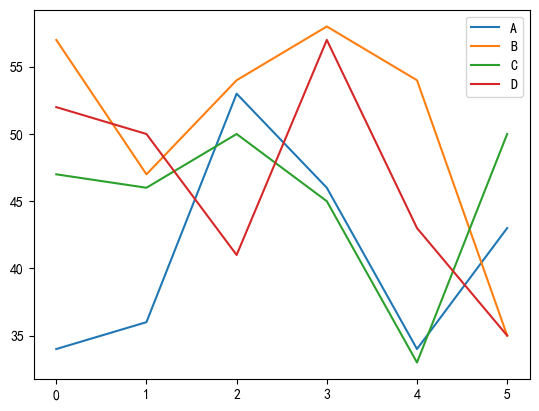

In [ ]:
#绘制折线图
#x:index, y:默认所有columns
df.plot()

<AxesSubplot: >

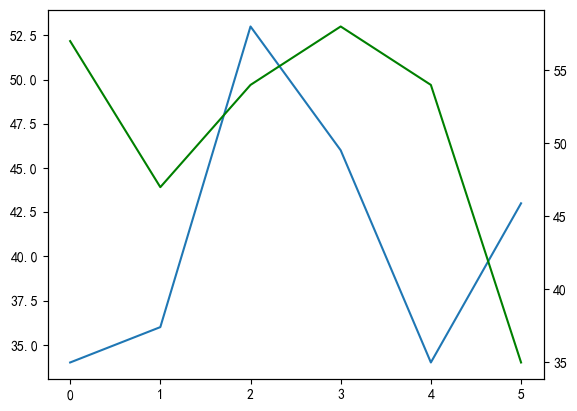

In [ ]:
#A使用左侧Y轴
df.A.plot()
#B使用右侧Y周
df.B.plot(secondary_y=True, style='g')

### 12.2 plot中可视化方法：
- 折线图：df.plot.line(x=None, y=None, **kwargs)
- 柱状图：df.plot.bar(x=None, y=None, **kwargs)
- 条形图：df.plot.barh(x=None, y=None, **kwargs)
- 直方图：df.plot.hist(by=None, bins=10, **kwargs)
- KDE图：df.plot.kde(bw_method=None, ind=None, **kwargs)
- 饼状图：df.plot.pie(**kwargs)
- 散点图：df.plot.scatter(x, y, s=None, c=None, **kwargs)
- 箱状图：df.plot.box(by=None, **kwargs)
- 区域块状图：df.plot.area(x=None, y=None, **kwargs)*kwargs)

<AxesSubplot: >

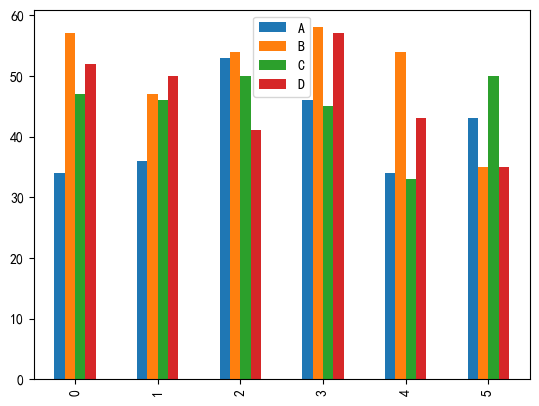

In [ ]:
# 柱状图
df.plot.bar()

<AxesSubplot: >

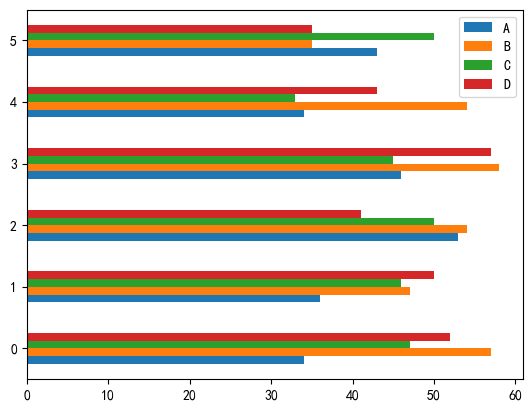

In [ ]:
# 条状图
df.plot.barh()

<AxesSubplot: ylabel='A'>

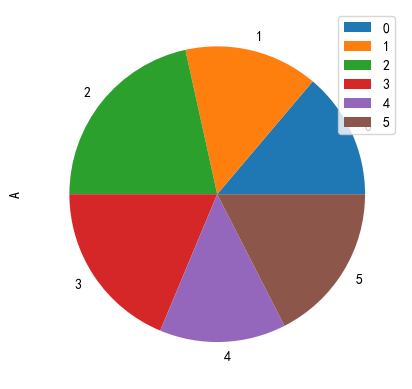

In [ ]:
# 柱状图
df.plot.pie(y='A')